--------------------------------Machine Learning Regression Model------------------------------------------------------

Importing Necessary Libraries

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Loading Training and Testing Datasets

In [43]:
train_data = pd.read_csv("train_data.csv",names=["f1", "f2", "target"])
testing_data = pd.read_csv("test_data.csv",names=["f1", "f2", "target"])
test_data=testing_data.iloc[:4991,:]

In [44]:
train_data.head(3)

,f1,f2,target
0,-7.262173,9.572604,5.358725
1,3.462140,10.684524,-13.275822
2,-12.996801,-3.446163,31.815190


In [45]:
test_data.head(3)

,f1,f2,target
0,15.893003,11.712829,-37.567929
1,-2.722421,-4.540615,11.475211
2,-14.587111,18.592864,11.468441


In [46]:
print(train_data.shape)
print(test_data.shape)

(10000, 3)
(4991, 3)


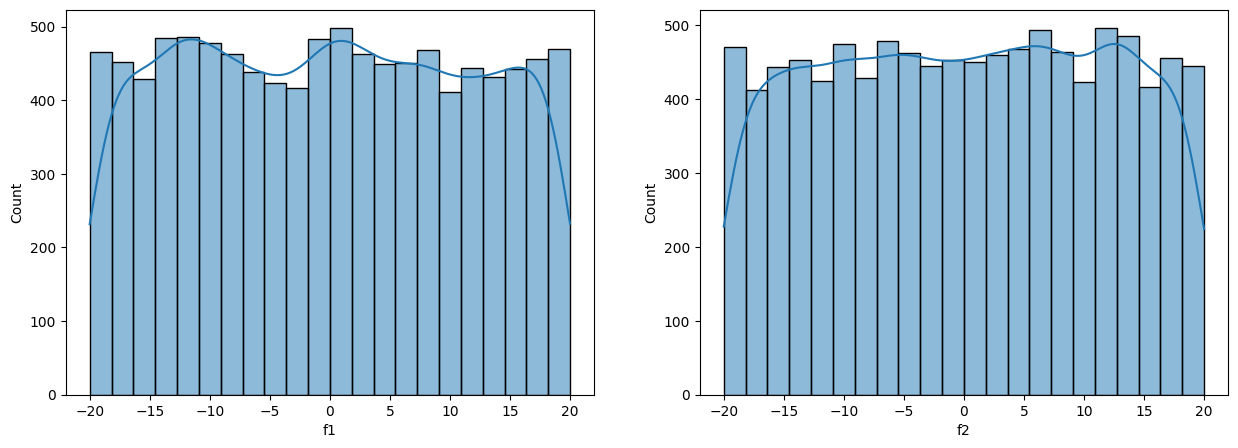

f1_train skewness:  0.01931436754085014
f2_train skewness:  -0.02006044168270276


In [47]:
#Checking train data for skewness
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(train_data["f1"], kde=True)
plt.subplot(1,2,2)
sns.histplot(train_data["f2"], kde=True)
plt.show()
print("f1_train skewness: ",train_data["f1"].skew())
print("f2_train skewness: ",train_data["f2"].skew())

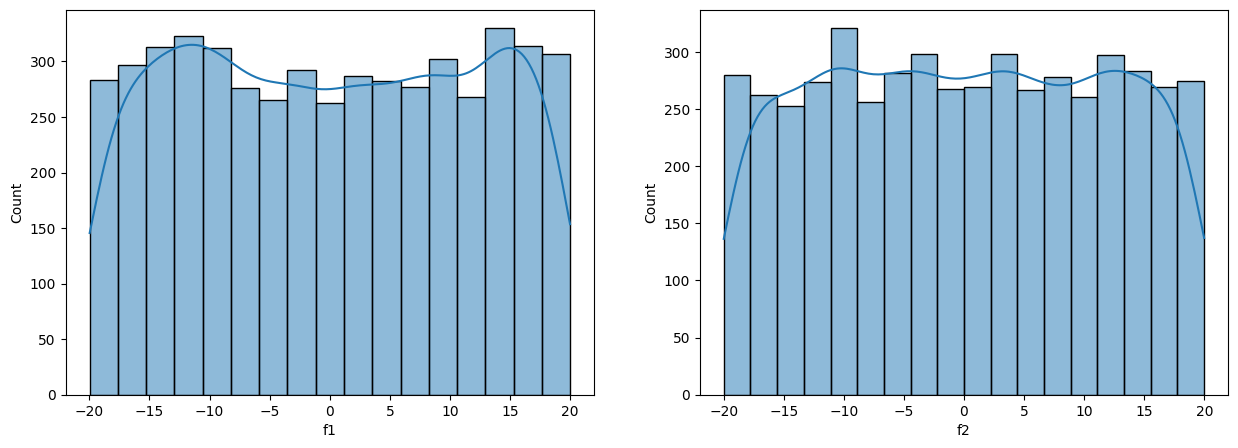

f1_test skewness:  0.00886227341251021
f2_test skewness:  -0.0011475156186492514


In [48]:
#Checking test data for skewness
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(test_data["f1"], kde=True)
plt.subplot(1,2,2)
sns.histplot(test_data["f2"], kde=True)
plt.show()
print("f1_test skewness: ",test_data["f1"].skew())
print("f2_test skewness: ",test_data["f2"].skew())

Splitting the Datas for Training and Testing

In [49]:
#Training datasets
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
#Testing datasets
X_test = test_data.iloc[:4991,:-1]
y_test = test_data.iloc[:4991,-1]

Feature Scaling

In [50]:
#Using StandardScalar,the Features are Preprocessed
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
#Saving the SC
with open ("sc.pkl","wb") as file:
    pickle.dump(sc,file)

 Function for Training Different Models

In [51]:

def linear_models(model):
    mod=model.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mae= mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    #Saving the Trained Model
    # if isinstance(model, SVR) and model.kernel == "linear" and model.C == 1.0:
    if isinstance(model, LinearRegression):
     with open ("model.pkl","wb") as file:
         pickle.dump(mod,file)
         
    return mse,mae,r2
    
   

In [52]:
#List of MAE and MSE for plotting graphe
MSE=[]
MAE=[]
R2=[]
#Model list
model_list=[SVR(kernel="linear",C=1.0),LinearRegression()]
model_name_list=["Support Vector Regression","Linear Regression"]
print("                                    Evaluation Metrics")
for model,model_name in zip(model_list,model_name_list):
    mse,mae,r2=linear_models(model)
    MSE.append(mse)
    MAE.append(mae)
    R2.append(r2)
    print(f"{model_name}:")
    print("   Mean Squared Error=",round(mse,3))
    print("   Mean Absolute Error=",round(mae,3))
    print("   R2_Score=",round(r2,3))
    print("-------------------------------------------------------------------------------------------------------------------------")

                                    Evaluation Metrics
Support Vector Regression:
   Mean Squared Error= 5.046
   Mean Absolute Error= 1.799
   R2_Score= 0.993
-------------------------------------------------------------------------------------------------------------------------
Linear Regression:
   Mean Squared Error= 5.047
   Mean Absolute Error= 1.799
   R2_Score= 0.993
-------------------------------------------------------------------------------------------------------------------------


Plotting Graph

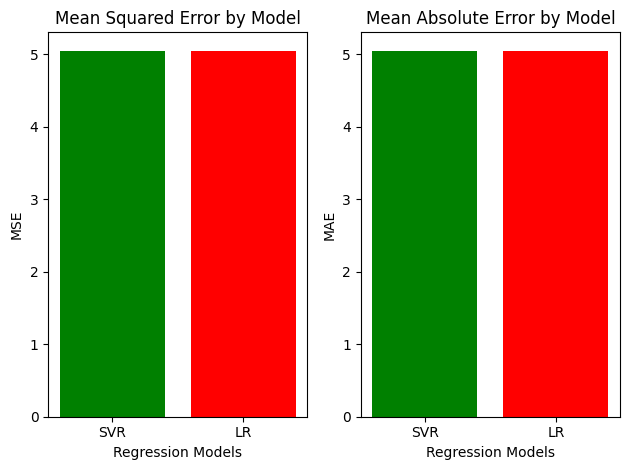

In [53]:
#MSE graph
plt.subplot(1,2,1)
plt.bar(["SVR","LR"],MSE,color=['green','red'])
plt.title("Mean Squared Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
#MAE graph
plt.subplot(1,2,2)
plt.bar(["SVR","LR"],MSE,color=['green','red'])
plt.title("Mean Absolute Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

Testing Model for New data

In [54]:
#sample data for  testing
sample=testing_data.tail(10)

In [55]:
sample=testing_data.tail(10)
actual_value=[]
predicted_value=[]
for index,row in sample.iterrows():
    f1= row.iloc[0]
    f2= row.iloc[1]
    target=row.iloc[2]
    actual_value.append(target)
    #Creating a dataframe using input values
    data={"f1":f1,"f2":f2}
    sample_df=pd.DataFrame(data,index=[0])
    #---------------------------------------------------------------------------------------------------------------------
    #Loading  trained models
    with open ("sc.pkl","rb") as file:
       sc=pickle.load(file)
    with open ("lr_model.pkl","rb") as file:
        model=pickle.load(file)
    #-------------------------------------------------------------------------------------------------------------------  
    #Testing the model
    sample_input=sc.transform(sample_df) #Standard Scalar
    prediction=model.predict(sample_input) #Linear Regresssion
    predicted_value.append(prediction[0])
#---------------------------------------------------------------------------------------------------------------------     
#Output DataFrame   
output_df=pd.DataFrame({"Actual Value":actual_value,"Predicted Value":predicted_value})  
output_df 

,Actual Value,Predicted Value
0,39.959896,37.285956
1,-32.738007,-29.462435
2,-0.638723,-2.364779
3,-0.379540,0.646445
4,-0.592773,0.651944
5,21.402087,24.787457
6,14.971488,15.279467
7,56.687193,59.626891
8,26.627790,27.332320
9,11.868025,9.568404


In [56]:
# #Getting inputs from user
# f1=float(input("Enter Feature_1")) #Feature 1
# f2=float(input("Enter Feature_2")) #feature 2
# #---------------------------------------------------------------------------------------------------------------------
# #Creating a dataframe using input values
# data={"f1":f1,"f2":f2}
# sample_df=pd.DataFrame(data,index=[0])
# #---------------------------------------------------------------------------------------------------------------------
# #Loading  trained models
# with open ("sc.pkl","rb") as file:
#    sc=pickle.load(file)
# with open ("lr_model.pkl","rb") as file:
#    model=pickle.load(file)
# #---------------------------------------------------------------------------------------------------------------------  
# #Testing the model
# sample_input=sc.transform(sample_df) #Standard Scalar
# prediction=model.predict(sample_input) #Linear Regresssion
# #---------------------------------------------------------------------------------------------------------------------
# #Predicted Output
# print("Predicted Value :",prediction[0])
